### Import avian bird flu data

In [1]:
import pandas as pd

bird_flu = pd.read_csv('bird flu.csv')
bird_flu.head()
bird_flu['Outbreak Date'] = pd.to_datetime(bird_flu['Outbreak Date'])


bird_flu = bird_flu.groupby(bird_flu["Outbreak Date"].dt.to_period("M"))["Outbreaks"].sum().reset_index()
bird_flu["Outbreak Date"] = bird_flu["Outbreak Date"].astype(str)


bird_flu.head()

,Outbreak Date,Outbreaks
0,2022-02,8
1,2022-03,56
2,2022-04,68
3,2022-05,56
4,2022-06,14


### Initialize X and add avian bird flu data

In [2]:
X = pd.DataFrame()
X['Year-Month'] = bird_flu['Outbreak Date']
X['Outbreaks'] = bird_flu['Outbreaks']

# Rename Outbreaks to Avian Outbreaks
X.rename(columns={'Outbreaks': 'Avian Outbreaks'}, inplace=True)

print(X.head())

  Year-Month  Avian Outbreaks
0    2022-02                8
1    2022-03               56
2    2022-04               68
3    2022-05               56
4    2022-06               14


### Import and initialize y

In [3]:
prices = pd.read_excel("grade a egg prices.xlsx", sheet_name="Monthly")

# Display the first few rows of the DataFrame
prices.head()
y = prices.rename(columns={"APU0000708111": "price"})
y.head()

# Convert observation_date to datetime format
y['observation_date'] = pd.to_datetime(y['observation_date'])
y['Year-Month'] = y['observation_date'].dt.to_period('M')
y = y[['Year-Month', 'price']].dropna()
y.head()

,Year-Month,price
0,1980-01,0.879
1,1980-02,0.774
2,1980-03,0.812
3,1980-04,0.797
4,1980-05,0.737


### Bacon prices

In [4]:
bacon_prices = pd.read_excel("bacon prices.xlsx", sheet_name="Monthly")

# Rename the second column to "bacon price"
bacon_prices = bacon_prices.rename(columns={bacon_prices.columns[1]: "bacon price"})
bacon_prices.head()

# Convert the observation date to datetime format
bacon_prices["observation_date"] = pd.to_datetime(bacon_prices["observation_date"])

# Group by year and month, and calculate the mean bacon price
bacon_prices["year_month"] = bacon_prices["observation_date"].dt.to_period("M")
bacon_prices_grouped = bacon_prices.groupby("year_month")["bacon price"].mean().reset_index()
bacon_prices_grouped.head()

,year_month,bacon price
0,1980-01,1.453
1,1980-02,1.410
2,1980-03,1.361
3,1980-04,1.323
4,1980-05,1.266


In [5]:
# Concat X and bacon_prices_grouped on Year-Month
X = pd.concat([X, bacon_prices_grouped], axis=1)
# Drop year_month column from X
X = X.drop(columns=["year_month"])
X.head()

,Year-Month,Avian Outbreaks,bacon price
0,2022-02,8.0,1.453
1,2022-03,56.0,1.410
2,2022-04,68.0,1.361
3,2022-05,56.0,1.323
4,2022-06,14.0,1.266


### Commerical Backyard Flocks

In [6]:
commercial_backyard_flocks = pd.read_csv("commercial-backyard-flocks.csv")
commercial_backyard_flocks.head()

# Convert the date column to datetime format
commercial_backyard_flocks['date'] = pd.to_datetime(commercial_backyard_flocks['Outbreak Date'])

# Group by year and month, and calculate the mean number of commercial backyard flocks
commercial_backyard_flocks['year_month'] = commercial_backyard_flocks['date'].dt.to_period('M')
commercial_backyard_flocks_grouped = commercial_backyard_flocks.groupby('year_month')['Flock Size'].sum().reset_index()
commercial_backyard_flocks_grouped.head()

,year_month,Flock Size
0,2022-02,1487328
1,2022-03,20958587
2,2022-04,14686259
3,2022-05,783375
4,2022-06,2173327


In [7]:
# Concat X and commercial_backyard_flocks_grouped on Year-Month
X = pd.concat([X, commercial_backyard_flocks_grouped], axis=1)
# Drop year_month column from X
X = X.drop(columns=["year_month"])
X.head()

,Year-Month,Avian Outbreaks,bacon price,Flock Size
0,2022-02,8.0,1.453,1487328.0
1,2022-03,56.0,1.410,20958587.0
2,2022-04,68.0,1.361,14686259.0
3,2022-05,56.0,1.323,783375.0
4,2022-06,14.0,1.266,2173327.0


### Cage free

In [8]:
cage_free = pd.read_csv('cage-free-percentages.csv')
cage_free.dropna()
cage_free['observed_month'] = pd.to_datetime(cage_free['observed_month'])
cage_free = cage_free.groupby(cage_free['observed_month'].dt.to_period('M'))['percent_eggs'].sum().reset_index()
cage_free

,observed_month,percent_eggs
0,2007-12,0.000000
1,2008-12,0.000000
2,2009-12,0.000000
3,2010-12,0.000000
4,2011-12,0.000000
...,...,...
60,2020-10,23.923739
61,2020-11,23.826924
62,2020-12,23.899118
63,2021-01,24.388197


In [9]:
# Concat X and cage_free on observed_month and Year-Month
X = pd.concat([X, cage_free], axis=1)
# Drop observed_month column from X
X = X.drop(columns=["observed_month"])
X.head()

,Year-Month,Avian Outbreaks,bacon price,Flock Size,percent_eggs
0,2022-02,8.0,1.453,1487328.0,0.0
1,2022-03,56.0,1.410,20958587.0,0.0
2,2022-04,68.0,1.361,14686259.0,0.0
3,2022-05,56.0,1.323,783375.0,0.0
4,2022-06,14.0,1.266,2173327.0,0.0


### Egg production

In [10]:
# Import egg production data
egg_production = pd.read_csv("egg-production.csv")
egg_production.head()

# Convert the date column to datetime format
egg_production['observed_month'] = pd.to_datetime(egg_production['observed_month'])

# Group by year and month, and calculate the mean number of eggs produced
egg_production['year_month'] = egg_production['observed_month'].dt.to_period('M')
egg_production.head()
egg_production_grouped = egg_production.groupby('year_month')['n_hens'].sum().reset_index()
egg_production_grouped.head()

,year_month,n_hens
0,2016-07,357644000
1,2016-08,389012000
2,2016-09,390931000
3,2016-10,400309000
4,2016-11,405444000


In [11]:
# Merge the two DataFrames on Year-Month
X = pd.concat([X, egg_production_grouped], axis=1)
# Drop year_month column from X
X = X.drop(columns=["year_month"])
X.head()

,Year-Month,Avian Outbreaks,bacon price,Flock Size,percent_eggs,n_hens
0,2022-02,8.0,1.453,1487328.0,0.0,357644000.0
1,2022-03,56.0,1.410,20958587.0,0.0,389012000.0
2,2022-04,68.0,1.361,14686259.0,0.0,390931000.0
3,2022-05,56.0,1.323,783375.0,0.0,400309000.0
4,2022-06,14.0,1.266,2173327.0,0.0,405444000.0


# Training the model

In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# One-hot encode the 'Year-Month' column
X_encoded = pd.get_dummies(X, columns=['Year-Month'], drop_first=True)

# Drop rows where y is missing, keep all rows in X_encoded
y_clean = y['price'].dropna()
X_clean = X_encoded.loc[y_clean.index]

# Impute missing values in features with column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_clean), columns=X_clean.columns, index=X_clean.index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_clean, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the models
y_lr = lr_model.predict(X_test)
y_rf = rf_model.predict(X_test)

# Calculate RMSE and R^2 for Linear Regression
lr_rmse = mean_squared_error(y_test, y_lr)
lr_r2 = r2_score(y_test, y_lr)

# Calculate RMSE and R^2 for Random Forest Regressor
rf_rmse = mean_squared_error(y_test, y_rf)
rf_r2 = r2_score(y_test, y_rf)

# Print the evaluation metrics
print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R^2:", lr_r2)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R^2:", rf_r2)


Linear Regression RMSE: 0.22386952706185123
Linear Regression R^2: 0.5629109788983956
Random Forest RMSE: 0.12171855211631949
Random Forest R^2: 0.7623533515585265


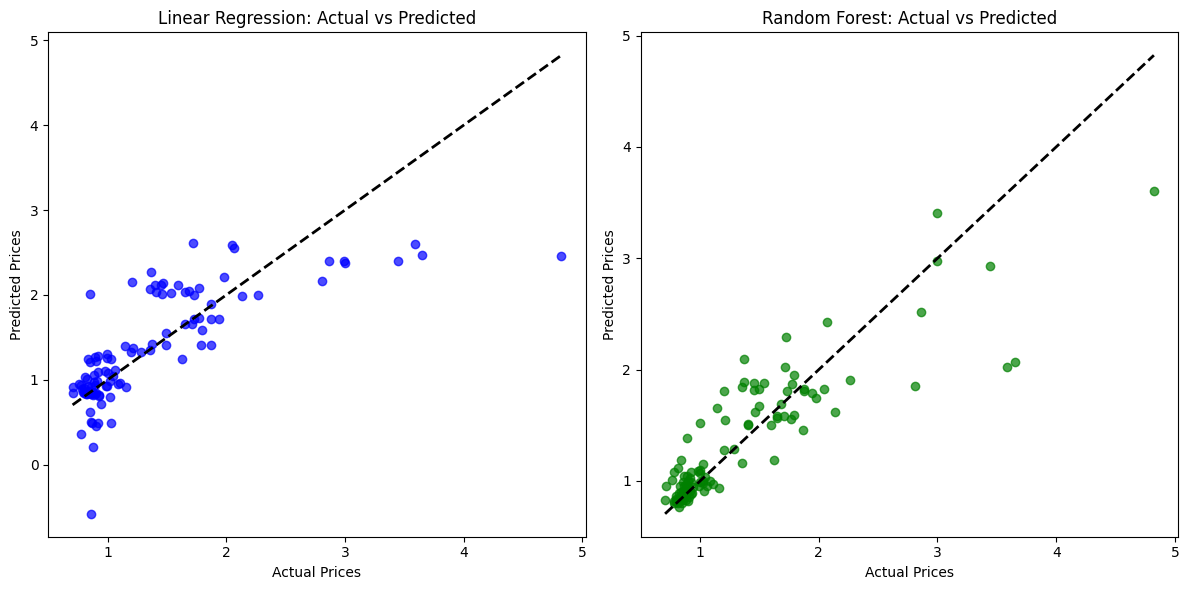

In [30]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_lr, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted')

# Scatter plot for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_rf, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted')

plt.tight_layout()
plt.show()